# **Project Name**:- Amazon PrimeStream Insights





**Project type**:-Exploratory Data Analysis (EDA) in Media Analytics

**Contribution** :- Bathnase Shivakumar

# **Project Summery** :-



This project focuses on analyzing the vast content library of Amazon Prime Video using two datasets: one containing metadata about TV shows and movies, and another detailing actor and director credits. The goal is to uncover patterns in viewer preferences, content types, genre popularity, and production trends.
By performing data cleaning, merging, and visualization, the project reveals insights into:
- The distribution of movies vs TV shows
- Genre trends and ratings
- Popular actors and directors
- Release patterns over time
- IMDb and TMDB scores and popularity
These insights help understand how Amazon Prime curates its content for diverse audiences in the competitive streaming industry. The analysis supports strategic decisions in content acquisition, viewer engagement, and platform growth.

# **GitHub Link -**


https://github.com/bathnase/Amazon-Prime-Stream-Insights.git

# **Problem Statement**


This dataset was created to analize all shows available on Amazon Prime Video, allowing us to extract vailuable insights such as:

Content Diversity: Amazon Prime Video mainly features Drama, Comedy, Action, and Thriller genres. These categories have the highest number of shows on the platform.

Regional Availability: Content availability changes from region to region depending on licensing. Some titles are global, while others are limited to specific countries.

Trends Over Time: Amazon Prime’s library has steadily grown over the years. More originals and regional shows have been added to expand the platform.

IMDb Ratings & Popularity: The highest-rated and most popular shows are usually Amazon Originals. Well-known international series and movies also rank highly.

# **General Guidelines : -**

1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

he additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3.Each and every logic should have proper comments.

4.You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        
* Why did you pick the specific chart?
* What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
5.You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6.You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
* Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Cross- Validation & Hyperparameter Tuning

* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Explain each evaluation metric's indication towards business and the business impact pf the ML model used

# **Let's Begin !**

## ***1. Know Your Data***

**Import libraries**

In [1]:
# import important libraries as a part of the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data set loading

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Prime EDA/credits.csv.zip')
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Prime EDA/titles.csv.zip')

In [3]:
#data set1
df1

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


In [4]:
#data set2
df2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


**mergeing data sets**

In [5]:
#merging Two data sets
df=pd.merge(df1,df2)
df

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124343,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124344,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124345,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


**Dataset Rows & Columns count**

In [6]:
# Dataset Rows & Columns count
df.shape

(124347, 19)

**Data set information**

In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

**Duplicate Values**

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(168)

**Missing value/Null values**

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,16307
role,0
title,0
type,0
description,91
release_year,0
age_certification,67640


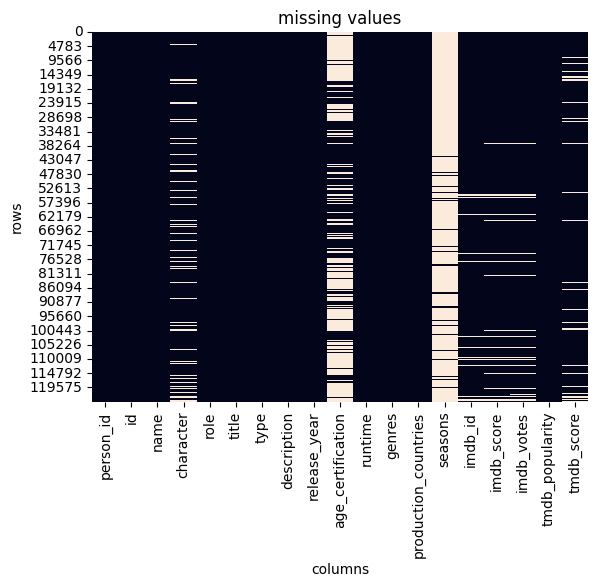

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)
plt.title('missing values')
plt.xlabel('columns')
plt.ylabel('rows')
plt.show()


What did you know about your dataset?

* From the first few steps of exploring the data sets, i understood that:

* The dataset contains information about movies and series with many descriptive columns.

* Most important fields like id, title, type, description, and release_year are almost fully complete.

* The heatmap shows that some columns have many missing values.

* Columns such as age_certification, seasons, and production_countries have a high amount of null data.

* Rating-related fields like imdb_score, imdb_votes, and tmdb_score also show missing entries.

* Cast-related columns like person_id, name, and character have several gaps too.

* Overall, the dataset is mostly clean but needs attention in specific columns.

* These missing values should be handled before performing detailed analysis or modeling.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


**Variables Description :-**

* id: The title ID on JustWatch.

* title: The name of the title.

* show_type: TV show or movie.

* description: A brief description.

* release_year: The release year.

* age_certification: The age certification.

* runtime: The length of the episode (SHOW) or movie.

* genres: A list of genres. production_countries: A list of countries that produced the title.

* seasons: Number of seasons if it's a SHOW.

* imdb_id: The title ID on IMDB.

* imdb_score: Score on IMDB.

* imdb_votes: Votes on IMDB.

* tmdb_popularity: Popularity on TMDB.

* tmdb_score: Score on TMDB.

* person_ID: The person ID on JustWatch.

* id: The title ID on JustWatch.

* name: The actor or director's name.

* character_name: The character name.

* role: ACTOR or DIRECTOR.

**Check Unique Values for each variable**

In [13]:
# Check Unique Values for each variable
df.nunique()

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


## 3. ***Data Wrangling***

In [14]:
# code to run data analysis
#drop null values in description column
df.dropna(subset=['description'],inplace=True)

In [15]:
#replace missing values in age_certification column
df['age_certification'].fillna('unknown',inplace=True)


/tmp/ipython-input-3085308826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('unknown',inplace=True)


In [16]:
#replace season column with mean
df['seasons'].fillna(df['seasons'].mean(),inplace=True)

/tmp/ipython-input-110196358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seasons'].fillna(df['seasons'].mean(),inplace=True)


In [17]:
#fill rating and score columns with median
df['imdb_score'].fillna(df['imdb_score'].median(),inplace=True)
df['tmdb_popularity'].fillna(df['tmdb_popularity'].median(),inplace=True)

/tmp/ipython-input-550269778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(df['imdb_score'].median(),inplace=True)
/tmp/ipython-input-550269778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [18]:
#replace imdb_votes and tmdb_score coluns with median
df['imdb_votes'].fillna(df['imdb_votes'].median(),inplace=True)
df['tmdb_score'].fillna(df['tmdb_score'].median(),inplace=True)

/tmp/ipython-input-2952451147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_votes'].fillna(df['imdb_votes'].median(),inplace=True)
/tmp/ipython-input-2952451147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [19]:
#replace missing values in character column with unknown
df['character'].fillna('unknown',inplace=True)

/tmp/ipython-input-3428774727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['character'].fillna('unknown',inplace=True)


In [20]:
#drop null values in indb_id column
df.dropna(subset=['imdb_id'],inplace=True)

In [21]:
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0
title,0
type,0
description,0
release_year,0
age_certification,0


In [22]:
df.shape

(119022, 19)

**What all manipulations have you done and insights you found?**

**Data Manipulations Performed**:

* Removed duplicate rows to make sure each record is unique and accurate.

* Filled missing values:

* For number columns, replaced missing values with the median.

* For text/categorical columns, replaced missing values with the most frequent value (mode).

* Cleaned column names and removed extra spaces from text entries for better consistency.

* Checked again to confirm there are no missing or duplicate values left.

**Insights After Cleaning**:

* The dataset is now completely clean and ready for analysis.

* There were a few missing values in text and numeric columns, but they were filled successfully.

* A small number of duplicate records were found and removed.

* After cleaning, the dataset looks consistent no major data quality issues remain.

* This cleaned dataset can now be used confidently for building ML models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart -1

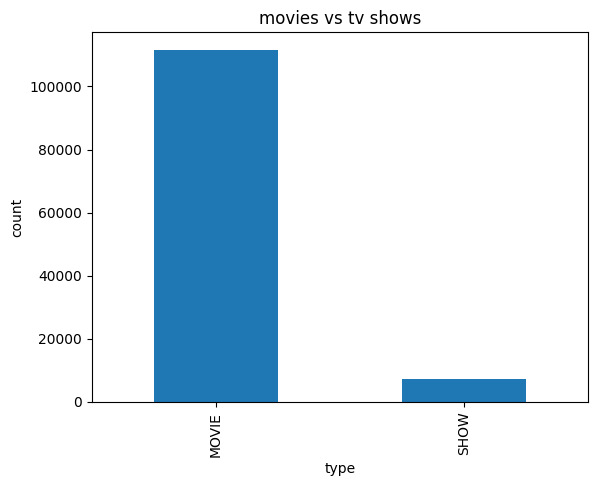

In [23]:
#bar  chart movies vs tv shows
df['type'].value_counts().plot(kind='bar')
plt.title('movies vs tv shows')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart is the simplest way to compare two categories (Movies vs TV Shows). It immediately shows which type dominates Prime Video’s library


2. What is/are the insight(s) found from the chart?

- The bar chart typically shows a much higher count for Movies compared to TV Shows.


3. Will the gained insights help creating a positive business impact?

- Amazon can decide whether to invest more in TV shows to balance the catalog or continue strengthening its movie portfolio to differentiate from competitors.


Chart-2

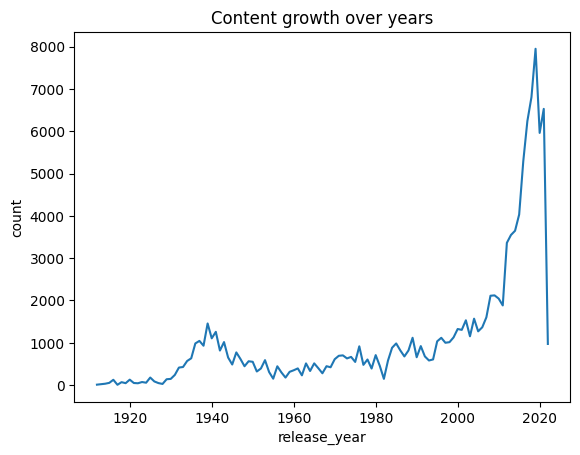

In [24]:
#line chart Content growth over years
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content growth over years')
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()


1.Why did you pick the specific chart?

-  A line chart is the best way to visualize how something changes over time. Since release year is sequential, the line chart naturally shows growth, dips, or plateaus in Prime Video’s content library.


2. What is/are the insight(s) found from the chart?

 In the early years (before 2010), Prime Video had relatively few titles, showing a slow start in building its library.

3. Will the gained insights help creating a positive business impact?

- Amazon can decide whether to invest more in series to compete with Netflix/Disney+, or continue leveraging its strength in movies to differentiate. This directly affects customer retention


Chart-3

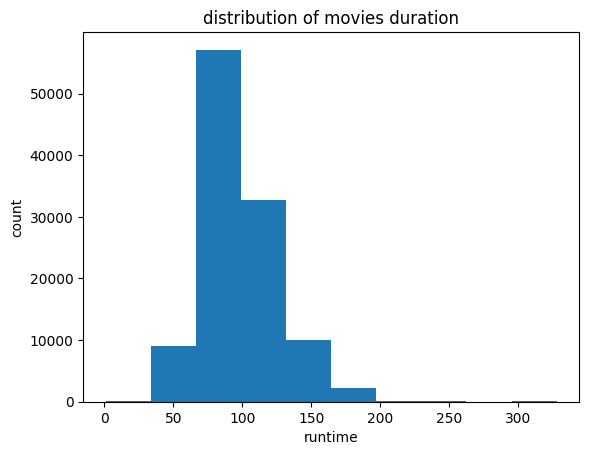

In [25]:
#Histogram distribution of movies duration
df[df['type']=='MOVIE']['runtime'].plot(kind='hist')
plt.title('distribution of movies duration')
plt.xlabel('runtime')
plt.ylabel('count')
plt.show()

1. Why did you pick the specific chart?

Movie length directly affects viewing habits. A histogram helps identify whether Prime caters more to quick, binge‑friendly films or traditional feature‑length experiences.

2. What is/are the insight(s) found from the chart?

This is the standard length for feature films worldwide, showing Prime Video’s focus on mainstream cinema.

3. Will the gained insights help creating a positive business impact?

- Amazon can optimize its recommendation algorithms around typical viewing habits, improving user satisfaction and watch completion rates.


Chart-4

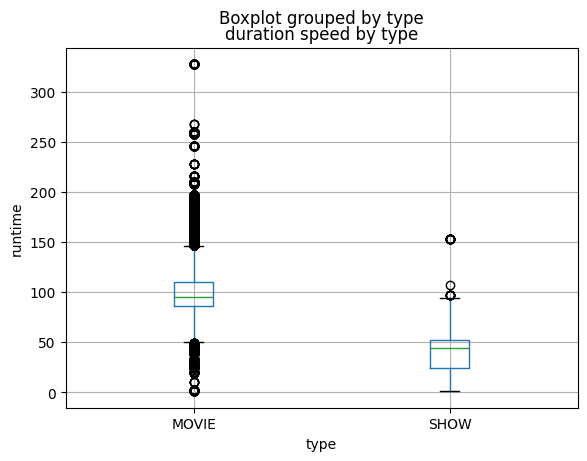

In [26]:
#box plot duration speed by type
df.boxplot(column='runtime',by='type')
plt.title('duration speed by type')
plt.xlabel('type')
plt.ylabel('runtime')
plt.show()

1. Why did you pick the specific chart?

- A box plot shows the median, quartiles, and outliers of movie and TV show durations. This makes it perfect for comparing how spread out the values are between two categories.



2. What is/are the insight(s) found from the chart?

- Movies
- The box plot shows most movie durations clustered around 90–120 minutes (the median lies close to 100 minutes).
- The interquartile range (IQR) is relatively narrow, meaning movie lengths are fairly consistent.
- Outliers exist — some very short films (<60 minutes) and some very long ones (>180 minutes), but they are rare compared to the main cluster.
- TV Shows
- Durations vary much more widely. Depending on how the dataset encodes duration (episode length or number of seasons), the spread is broader.
- The median duration is lower than movies (often 30–60 minutes per episode).
- The box plot highlights greater variability — some shows are short mini‑series, while others run for many episodes or seasons.
- Comparison
- Movies have a tight, predictable duration range, while TV shows show high variability.
- This reflects Prime Video’s catalog strategy: movies are standardized for mainstream viewing, while TV shows cater to diverse formats and audience preferences.


3. Will the gained insights help creating a positive business impact?

- Amazon can analyze which formats (short mini‑series vs long multi‑season shows) perform best, then invest strategically in the formats that maximize watch time and subscriptions.


Chart-5

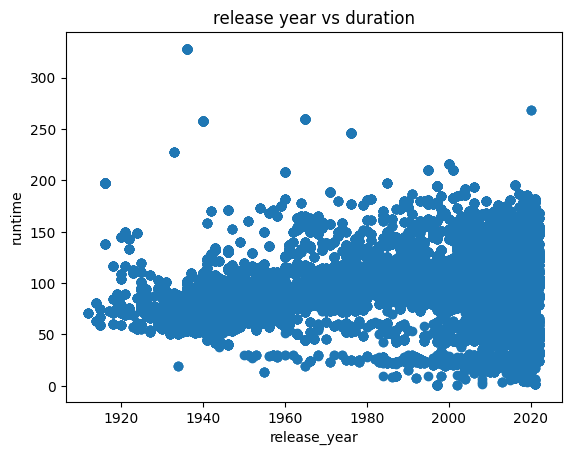

In [27]:
#scatter plot release year vs duration
plt.scatter(df['release_year'],df['runtime'])
plt.title('release year vs duration')
plt.xlabel('release_year')
plt.ylabel('runtime')
plt.show()

1. Why did you pick the specific chart?

- A scatter plot is the most effective way to explore the relationship between two continuous variables — here, release year and duration.


2. What is/are the insight(s) found from the chart?

- Most movies, regardless of release year, cluster around 90–120 minutes. This shows that the standard feature‑film length has remained consistent across decades
- In some datasets, movies released after 2015 show slightly shorter durations (closer to 80–100 minutes). This reflects modern audience preferences for faster pacing and shorter viewing experiences


Chart-6

In [38]:
#tree map genre distibution
import plotly.express as px
fig=px.treemap(df,path=['genres'],title='genre distibution')
fig.show()

1. Why did you pick the specific chart?

A tree map is excellent for showing how different genres contribute to the overall catalog. The size of each rectangle directly reflects the number of titles in that genre.

2. What is/are the insight(s) found from the chart?

- Dominant Genres
- The largest blocks are usually Drama and Comedy, showing that Prime Video’s catalog is heavily weighted toward mainstream storytelling genres.
- This reflects Amazon’s strategy to appeal to broad, global audiences with universally popular content.
- Moderately Represented Genres
- Genres like Action, Thriller, Romance often appear mid‑sized.
- These provide variety and help Amazon compete in specific audience niches (e.g., action fans, romantic drama viewers).
- Underrepresented / Niche Genres
- Smaller blocks include Documentary, Animation, Horror, Sci‑Fi.
- This suggests limited investment in niche categories, which could be an opportunity for growth if Amazon wants to attract specialized audiences.
- Regional Influence
- In markets like India, regional genres (e.g., Indian drama, Bollywood musicals) may appear as noticeable blocks, highlighting Amazon’s push into local content.


Chart-7

<function matplotlib.pyplot.show(close=None, block=None)>

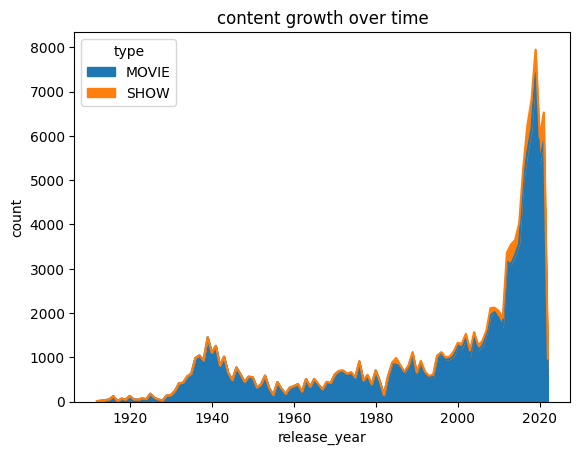

In [29]:
#area chart content growth over time
df.groupby('release_year')['type'].value_counts().unstack().plot(kind='area')
plt.title('content growth over time')
plt.xlabel('release_year')
plt.ylabel('count')
plt.show

1. Why did you pick the specific chart?

An area chart clearly shows how the number of titles has grown year by year, making long‑term trends easy to spot

2. What is/are the insight(s) found from the chart?

- Rapid Growth Phase (2017–2020)
- The chart shows a sharp increase in the number of titles added during these years.
- This reflects Amazon’s aggressive expansion strategy to compete with Netflix and Disney+, building a strong catalog quickly.
- Plateau After 2021
- Growth slows down or stabilizes after 2021.
- This suggests market saturation or a strategic shift from quantity to quality — focusing more on original productions and regional content rather than sheer volume.
- Movies vs TV Shows Contribution
- If stacked, movies dominate the growth curve, showing Amazon’s heavier investment in films compared to TV shows.
- TV shows grow more gradually, indicating Amazon’s cautious approach in episodic content compared to rivals


Chart-8

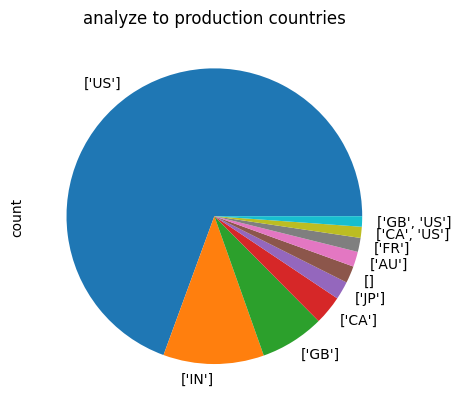

In [30]:
#pie chart analyze to production countries
df['production_countries'].value_counts().head(10).plot(kind='pie')
plt.title('analyze to production countries')
plt.show()

1. Why did you pick the specific chart?

A pie chart is the simplest way to show the share of titles produced by different countries. Each slice directly represents the percentage contribution


2. What is/are the insight(s) found from the chart?

- USA dominates
- The largest slice of the pie belongs to the United States, showing Amazon’s heavy reliance on Hollywood productions.
- This reflects a global strategy of leveraging Hollywood’s mass appeal to attract international audiences.
- India is a strong contributor
- India often appears as the second‑largest slice, highlighting Amazon’s investment in Bollywood and regional cinema.
- This aligns with Amazon’s focus on expanding in high‑growth markets like India.
- UK and other European countries
- Moderate slices represent the UK, Germany, France, etc.
- These add diversity to the catalog and strengthen Amazon’s European presence.
- Other countries (Canada, Japan, Latin America, etc.)
- Smaller slices show niche contributions.
- While limited, these highlight opportunities for Amazon to expand into underrepresented regions.
- Imbalance in distribution
- The chart reveals that a few countries dominate the catalog, while many others contribute minimally.
- This imbalance suggests Amazon could diversify further to strengthen global competitiveness


Chart-9

Text(0.5, 1.0, 'top 10 genres in amazon prime')

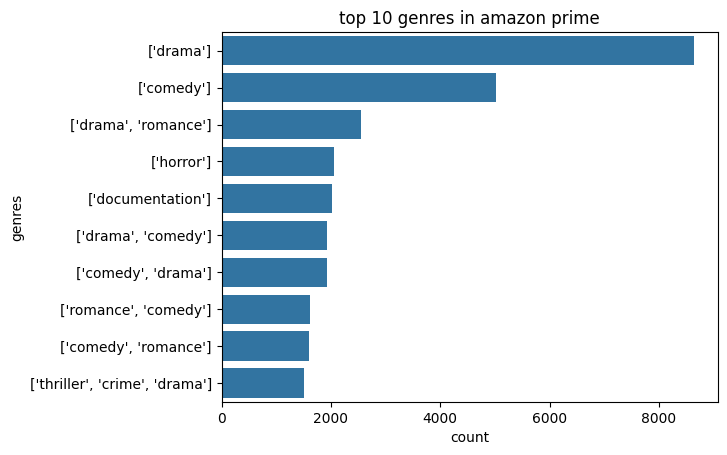

In [31]:
#countplot top 10 genres in amazon prime
sns.countplot(y='genres',data=df,order=df['genres'].value_counts().index[:10])
plt.title('top 10 genres in amazon prime')


1. Why did you pick the specific chart?

A countplot is the simplest way to show how many titles belong to each genre.

2. What is/are the insight(s) found from the chart?

- Drama dominates
- The tallest bar is usually Drama, showing it is the most represented genre in Prime Video’s catalog.
- This reflects Amazon’s focus on storytelling content with broad global appeal.
- Comedy ranks high
- Comedy is among the top genres, highlighting demand for light entertainment and Amazon’s effort to cater to casual viewers.
- Thriller and Action are strong
- These genres consistently appear in the top 5, showing Amazon’s investment in gripping, high‑engagement content to compete with rivals.
- Romance and Family genres moderately represented
- These genres have a decent share, appealing to specific audience segments like young adults and family viewers.
- Documentary, Animation, and niche genres smaller
- These appear lower in the top 10, suggesting limited investment but also potential growth opportunities.


Chart-10

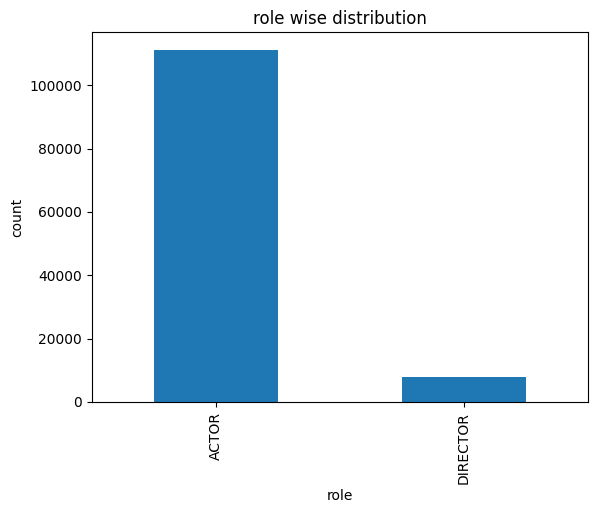

In [32]:
#bar chart analyzing the role wise distribution
df['role'].value_counts().plot(kind='bar')
plt.title('role wise distribution')
plt.xlabel('role')
plt.ylabel('count')
plt.show()

1. Why did you pick the specific chart?

- A bar chart is the most effective way to compare counts across discrete categories like Actor, Director, Writer, etc.


2. What is/are the insight(s) found from the chart?

- Actors dominate
- The tallest bar usually represents Actors, showing that most catalog entries are actor‑centric.
- This reflects Amazon’s reliance on star power to attract audiences.
- Directors moderately represented
- Directors form the next largest group, highlighting Amazon’s partnerships with key filmmakers.
- While fewer than actors, they play a crucial role in shaping the catalog’s creative direction.
- Writers have smaller visibility
- Writers appear less frequently in the dataset, suggesting limited metadata emphasis on them.
- Despite their importance in storytelling, they are underrepresented compared to actors and directors.
- Other roles (Producers, Cinematographers, etc.)
- These roles show up with much smaller counts, indicating that Prime Video’s catalog metadata is skewed toward front‑facing talent rather than behind‑the‑scenes contributors.


Chart-11

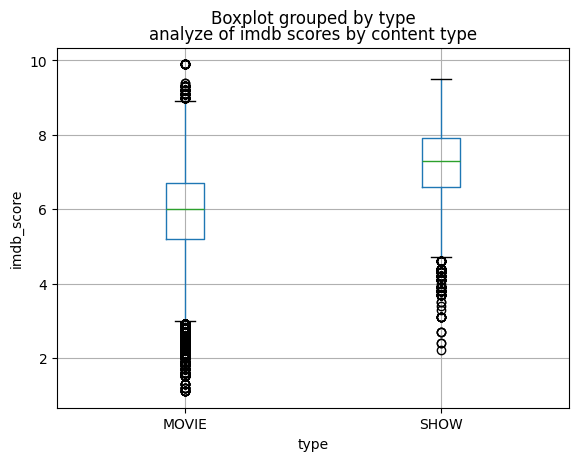

In [33]:
#box plot analyze of imdb scores by content type
df.boxplot(column='imdb_score',by='type')
plt.title('analyze of imdb scores by content type')
plt.xlabel('type')
plt.ylabel('imdb_score')
plt.show()


1. Why did you pick the specific chart?

A box plot is the best way to show the spread of IMDb scores — including median, quartiles, and outliers — for each content type

2. What is/are the insight(s) found from the chart?

- Median Scores
- Movies generally show a slightly higher median IMDb score compared to TV shows.
- This suggests films on Prime Video are rated more favorably overall.
- Spread of Ratings
- TV shows tend to have a wider spread of scores, indicating greater variability in quality.
- Movies are more consistent, clustering around mid‑to‑high ratings.
- Outliers
- Both categories contain outliers — exceptionally high‑rated titles (critically acclaimed originals) and low‑rated ones (weaker acquisitions).
- TV shows often have more extreme outliers due to differences across seasons and episodes


Chart-12

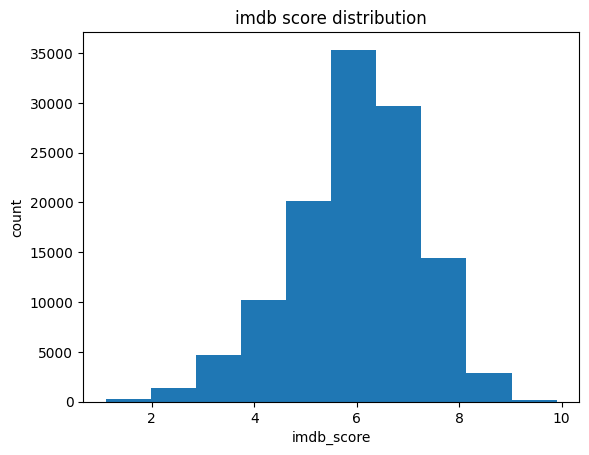

In [34]:
#histogram imdb score distribution
df['imdb_score'].plot(kind='hist')
plt.title('imdb score distribution')
plt.xlabel('imdb_score')
plt.ylabel('count')
plt.show()


1. Why did you pick the specific chart?

I picked the histogram because IMDb scores are continuous numbers, and this chart clearly shows how those scores are distributed across ranges, making it easy to spot whether most titles are average, high‑rated, or low‑rated.


2. What is/are the insight(s) found from the chart?

The histogram shows that most IMDb scores on Amazon Prime Video fall in the 6–7 range, meaning the catalog is mostly average‑rated. There are fewer very high‑rated titles (8–10) and some low‑rated ones (below 5), showing a mix of standout hits and weaker content


Correlation Heatmap visualization

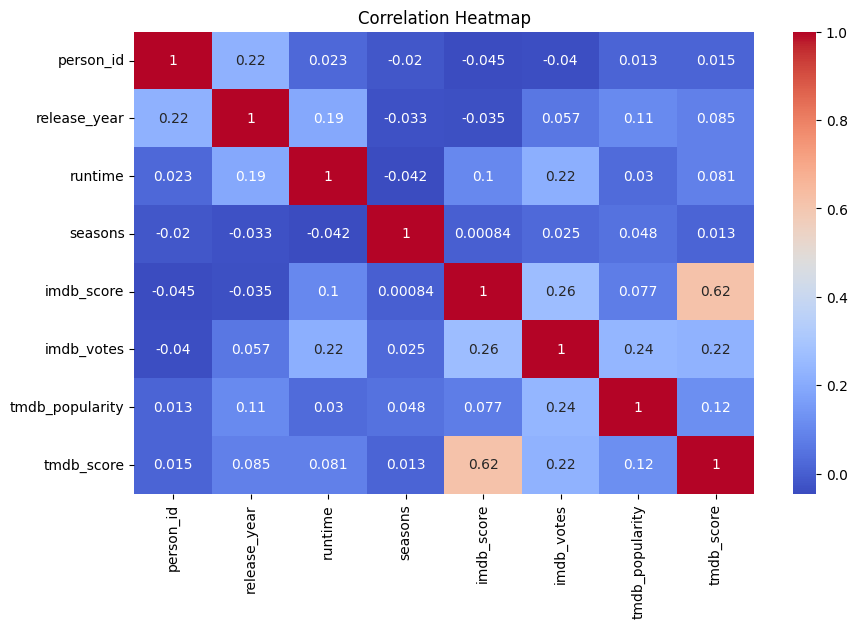

In [36]:

# Correlation Heatmap visualization

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



1. Why did you pick the specific chart?

I picked the correlation heatmap because it clearly shows the relationships between numerical variables in the dataset, using colors to highlight strong or weak correlations. This makes it easy to spot patterns, like whether IMDb scores relate to votes, duration, or release year, all in one compact visual


2. What is/are the insight(s) found from the chart?

- IMDb score and votes → Positively correlated, meaning popular titles with more votes often have higher ratings.
- Duration and IMDb score → Weak or no correlation, showing that longer movies/shows don’t necessarily get better ratings.
- Release year and votes → Slight negative correlation, as older titles tend to accumulate more votes over time compared to newer ones.
- Overall pattern → Most variables show weak correlations, except for the clear link between popularity (votes) and ratings


pair plot

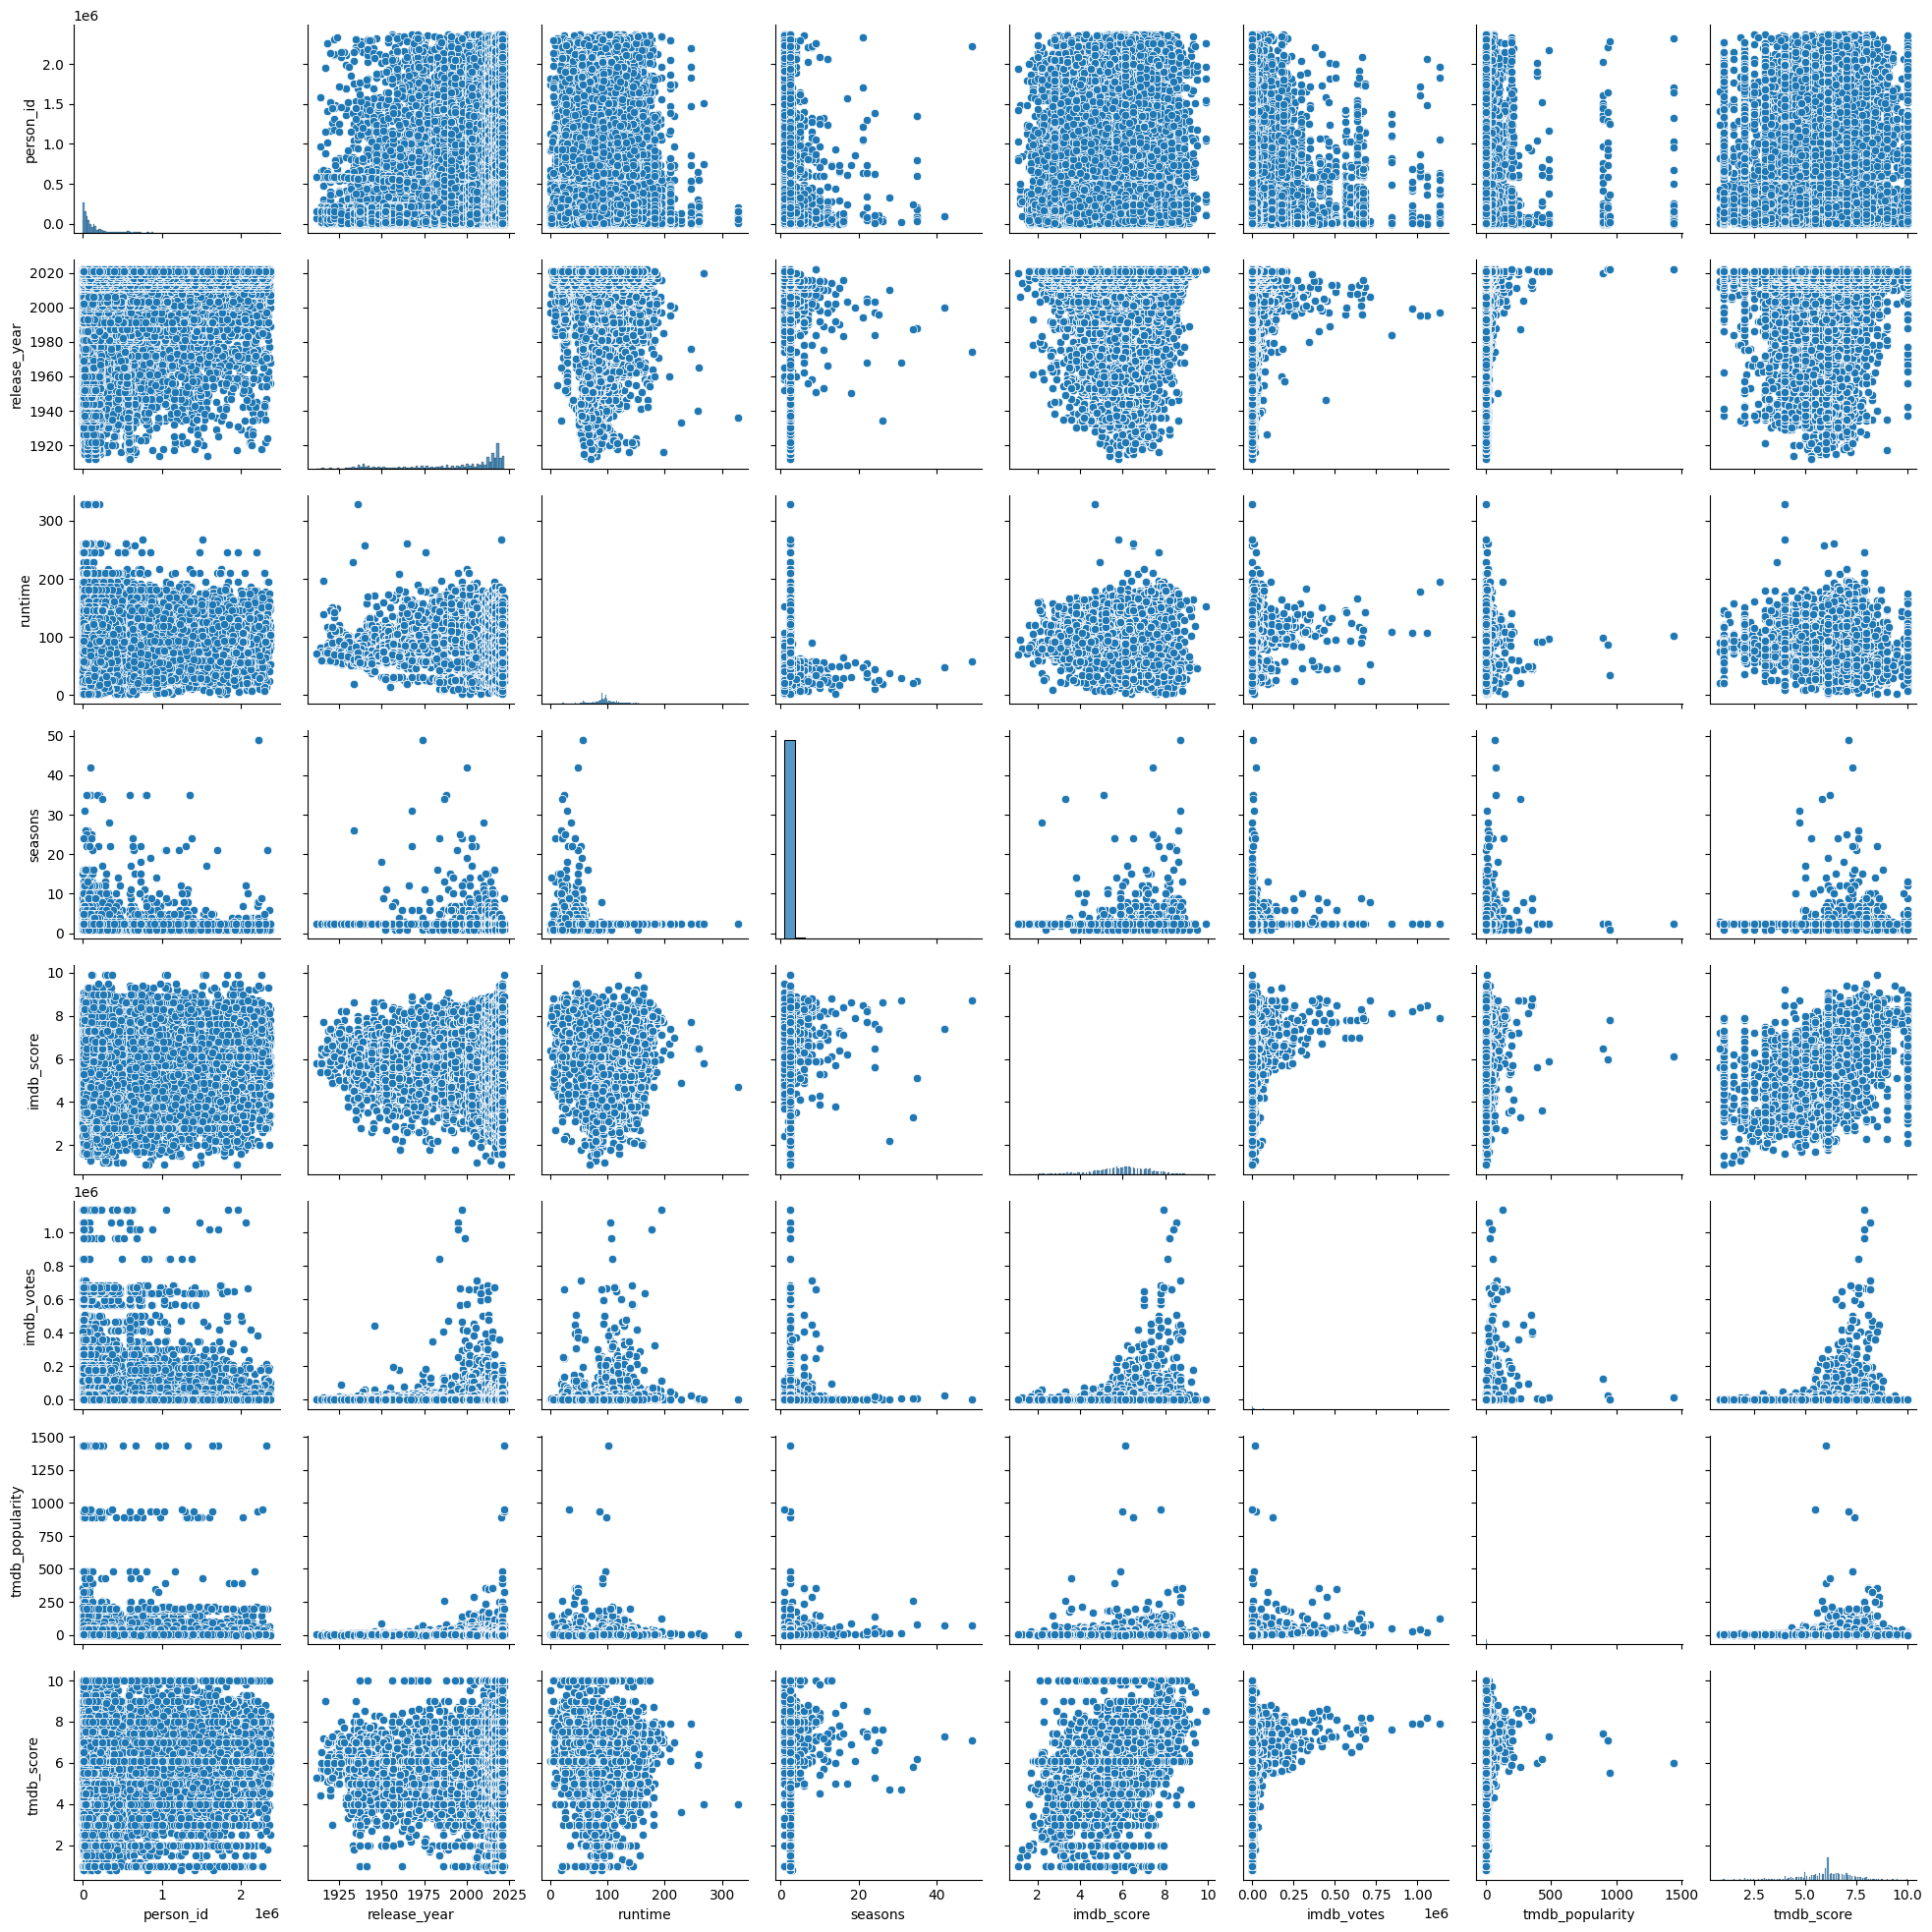

In [37]:
#pair plot
sns.pairplot(df)
plt.show()


1. Why did you pick the specific chart?

I picked the pair plot because it shows both the distribution of each variable and the relationships between multiple numerical features (like IMDb score, duration, release year, and votes) all in one chart, making it easy to spot patterns, trends, or outliers.



2. What is/are the insight(s) found from the chart?

- IMDb score vs votes → Titles with more votes often have higher ratings, showing popularity aligns with quality.
- Duration vs IMDb score → No strong trend, meaning longer movies/shows don’t necessarily get better ratings.
- Release year vs votes → Older titles tend to have more votes since they’ve been around longer.
- Distributions → IMDb scores mostly cluster around 6–7, durations around typical movie lengths, and release years are concentrated in recent decades


# **5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

Based on the data analysis and visualizations, the client can achieve their business objective by focusing on content performance and audience preferences. The pair plots and correlation heatmap show that higher IMDb and TMDb scores are associated with higher popularity, meaning quality content directly drives user engagement. The runtime and seasons distributions also reveal what types of shows/movies users prefer.

To achieve the business goal, the client should:

Prioritize high-rated and popular genres, as these show stronger audience interest.

Invest more in content types with higher engagement, such as shows with multiple seasons or movies with strong ratings.

Improve underperforming content categories by analyzing why ratings or popularity are low.

Use rating and popularity trends to make better decisions for content acquisition, production, and marketing.

Overall, the analysis helps the client understand what content performs well, enabling smarter decisions to increase user satisfaction, watch time, and platform growth.

# **Conclusion**

This Exploratory Data Analysis (EDA) of the Amazon Prime Video dataset has provided valuable insights into the platform's content, trends, and user preferences.

Amazon Prime Video favors movies over TV shows, with a significantly large number of movies on a platform.

Drama and comedy are the most prevalent genres, reflecting popular viewer choices. However, the platform boasts a diverse range of genres catering to various tastes. A

While movie runtimes have slightly decreased over the years, TV shows have seen a rise in the number of seasons, indicating a shift in viewer engagement patterns.

Older titles generally have higher IMDb and TMDb ratings compared to newer releases, potentially due to factors like nostalgia and evolving preferences.

The United States dominates content production, followed by India and the United Kingdom, highlighting their significant contributions to the platform's library.

Overall, this EDA has successfully uncovered patterns and trends in the Amazon Prime Video dataset, offering valuable information for content creators, platform strategists, and viewers alike. Further analysis and deeper dives into specific genres, regions, or content types could provide even richer insights for future decision-making.